In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
data = pd.read_csv('E:\\courses\\DL\\02_DNN\\Airline_Delay_Cause.csv')

In [3]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [5]:
data.dropna(inplace=True)

In [6]:
data['WDCase'] = data['weather_delay'].apply(lambda x : 1 if x >100 else 0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317261 entries, 0 to 318016
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317261 non-null  int64  
 1   month                317261 non-null  int64  
 2   carrier              317261 non-null  object 
 3   carrier_name         317261 non-null  object 
 4   airport              317261 non-null  object 
 5   airport_name         317261 non-null  object 
 6   arr_flights          317261 non-null  float64
 7   arr_del15            317261 non-null  float64
 8   carrier_ct           317261 non-null  float64
 9   weather_ct           317261 non-null  float64
 10  nas_ct               317261 non-null  float64
 11  security_ct          317261 non-null  float64
 12  late_aircraft_ct     317261 non-null  float64
 13  arr_cancelled        317261 non-null  float64
 14  arr_diverted         317261 non-null  float64
 15  arr_delay            3

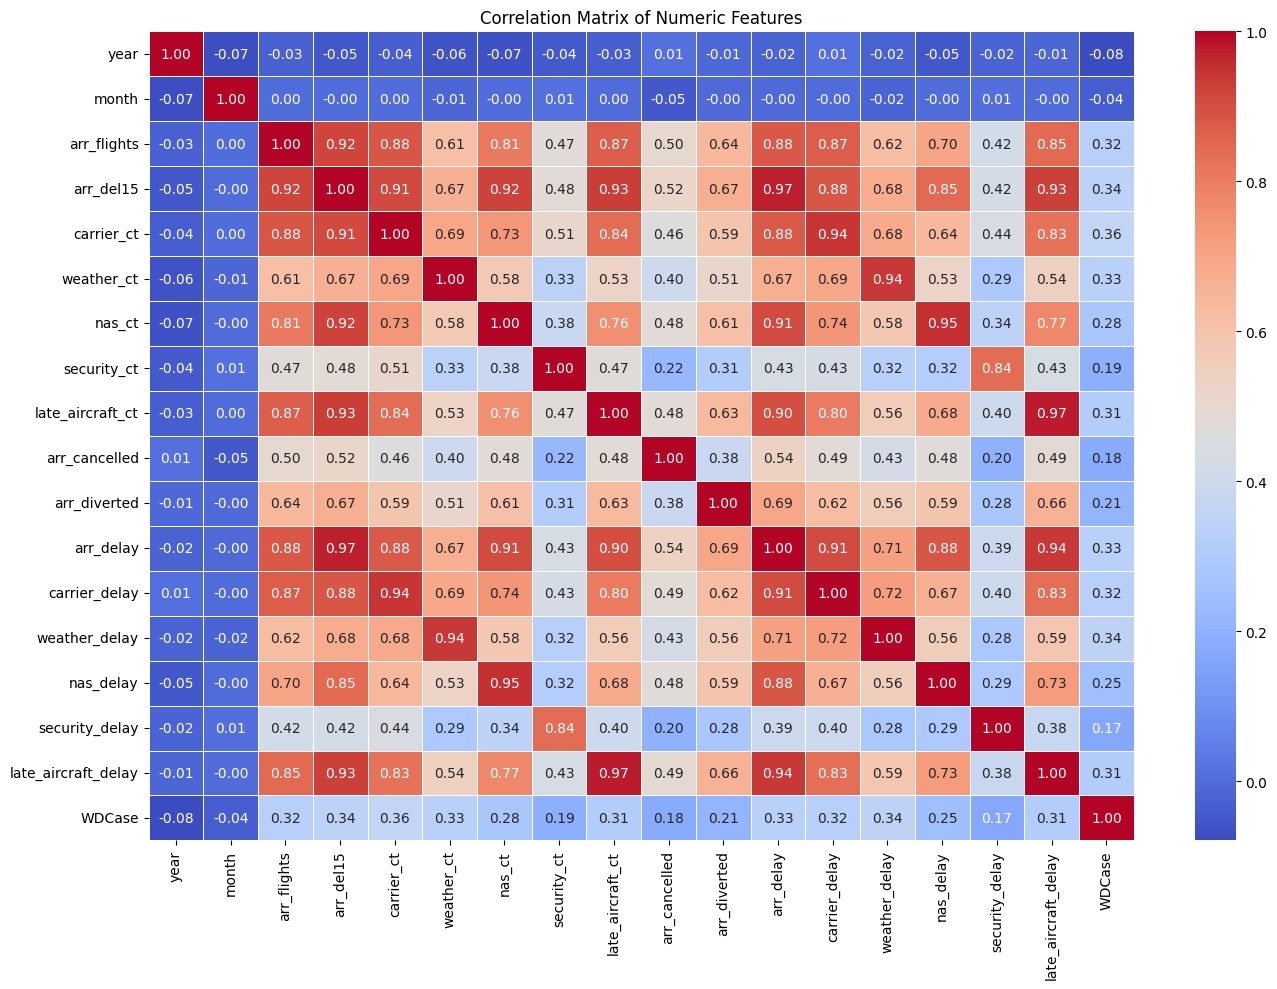

In [8]:
# Drop non-numeric (categorical) columns for correlation analysis
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [9]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317261 entries, 0 to 318016
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317261 non-null  int64  
 1   month                317261 non-null  int64  
 2   arr_flights          317261 non-null  float64
 3   arr_del15            317261 non-null  float64
 4   carrier_ct           317261 non-null  float64
 5   weather_ct           317261 non-null  float64
 6   nas_ct               317261 non-null  float64
 7   security_ct          317261 non-null  float64
 8   late_aircraft_ct     317261 non-null  float64
 9   arr_cancelled        317261 non-null  float64
 10  arr_diverted         317261 non-null  float64
 11  arr_delay            317261 non-null  float64
 12  carrier_delay        317261 non-null  float64
 13  weather_delay        317261 non-null  float64
 14  nas_delay            317261 non-null  float64
 15  security_delay       3

In [11]:
data['WDCase'].value_counts()

WDCase
0    215111
1    102150
Name: count, dtype: int64

In [12]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']

In [13]:
KerasModel = keras.models.Sequential([
    keras.layers.Input(shape=(17,)),                     # 👈 Specify input shape here
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [14]:
MyOptimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="AdamW")

In [15]:
KerasModel.compile(optimizer =MyOptimizer,loss='binary_crossentropy',metrics=['accuracy']) # matrix

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['WDCase'])
y = data['WDCase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all are numeric
print(X_train.dtypes)


year                     int64
month                    int64
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [17]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6651 - loss: 0.6058 - val_accuracy: 0.7475 - val_loss: 0.5369
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7488 - loss: 0.5030 - val_accuracy: 0.7644 - val_loss: 0.4849
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7701 - loss: 0.4763 - val_accuracy: 0.7801 - val_loss: 0.4668
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7826 - loss: 0.4612 - val_accuracy: 0.7859 - val_loss: 0.4526
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7856 - loss: 0.4472 - val_accuracy: 0.7871 - val_loss: 0.4432
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7875 - loss: 0.4395 - val_accuracy: 0.7904 - val_loss: 0.4370
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7902 - loss: 0.4325 - val_accuracy: 0.7918 - val_loss: 0.4300
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7912 - loss: 0.4245 - val_accuracy: 0.

In [18]:
print(X_train.shape)
print(X_test.shape)

(253808, 17)
(63453, 17)


In [19]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,997 (136.71 KB)

 Trainable params: 11,665 (45.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,332 (91.14 KB)

None


In [21]:
import os

print("Current directory:", os.getcwd())
print("Files before saving:", os.listdir())

KerasModel.save('KerasModel.keras')

print("Files after saving:", os.listdir())

Current directory: C:\Users\user1\DeepLearningNotebooks
Files before saving: ['.ipynb_checkpoints', 'DL_lec2.ipynb']
Files after saving: ['.ipynb_checkpoints', 'DL_lec2.ipynb', 'KerasModel.keras']


In [22]:
NewKerasModel = keras.models.load_model('KerasModel.keras')


In [24]:
y_pred = NewKerasModel.predict(X_test)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 2s 668us/step


In [25]:
print('Prediction Shape is {}'.format(y_pred.shape))


Prediction Shape is (63453, 1)


In [26]:
print('Prediction items are {}'.format(y_pred[:5]))



Prediction items are [[9.9921310e-01]
 [9.4606559e-04]
 [1.6218994e-02]
 [2.0137899e-04]
 [9.9924427e-01]]


In [27]:
y_test[:5]

275895    1
119384    0
117327    0
53842     0
153312    1
Name: WDCase, dtype: int64

In [28]:

ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


1983/1983 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9992 - loss: 0.0034
Model Loss is 0.0033588572405278683
Model Accuracy is 0.9992120265960693


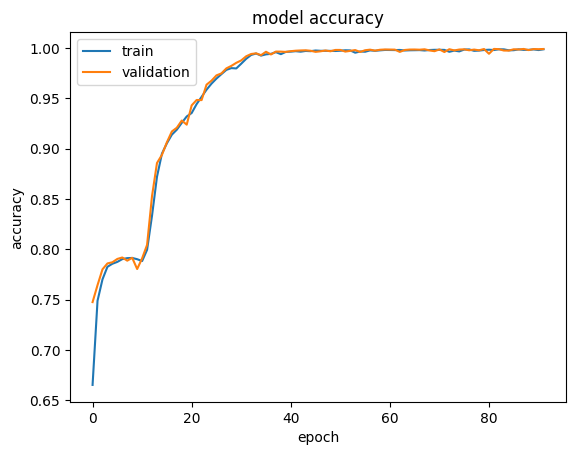

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


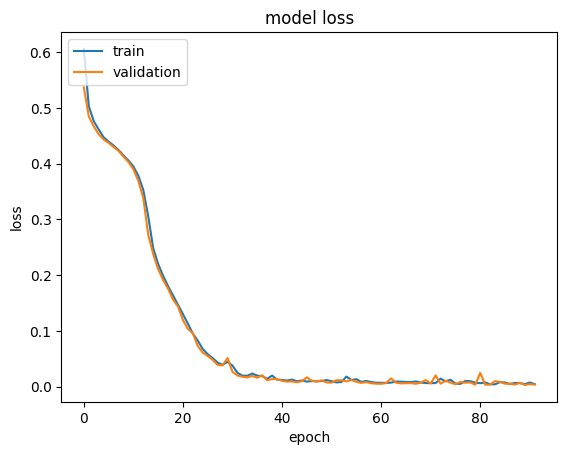

In [30]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [31]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float3

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[42915    32]
 [   18 20488]]
